In [200]:
#Importing libraries for visualization and preprocessing 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords

import nltk
from langdetect import detect
from googletrans import Translator
import plotly.express as px

import nbformat


# Importing Libraries for classification
import sklearn
from sklearn.model_selection import train_test_split




In [201]:
training_data = pd.read_table("DataSet\mediaeval-2015-trainingset.txt", sep="\t",lineterminator='\n', skiprows=(0),  header=0)

testing_data = pd.read_table("DataSet\mediaeval-2015-testset.txt", sep="\t",lineterminator='\n', skiprows=(0),  header=0)


In [202]:

# Create add imageId quantity helper function
def addImageIdQuantity(df: pd.DataFrame) -> pd.DataFrame:
    copy = df.copy(deep=True)
    copy['image_quantity'] = copy['imageId(s)'].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0)
    return copy

# Apply the function to the training_data DataFrame
df = addImageIdQuantity(training_data)

# Count the number of tweets for each number of images
image_quantity_counts = df['image_quantity'].value_counts().sort_index()

# Print the counts
for num_images, count in image_quantity_counts.items():
    print(f"Number of tweets with {num_images} images: {count}")


Number of tweets with 1 images: 14148
Number of tweets with 2 images: 121
Number of tweets with 3 images: 6
Number of tweets with 4 images: 1
Number of tweets with 5 images: 1


In [203]:
df.loc[addImageIdQuantity(df)['image_quantity'].idxmax()]

tweetId                                          325051231968059394
tweetText         Share this. Possible suspect in Boston Bombing...
userId                                                    616188525
imageId(s)        boston_real_02,boston_real_03,boston_real_04,b...
username                                                the_guz_man
timestamp                            Fri Apr 19 01:00:27 +0000 2013
label                                                          real
image_quantity                                                    5
Name: 12759, dtype: object

In [204]:


from dateutil import parser

# Define a custom function to handle the datetime conversion
def parse_datetime(dt_string):
    try:
        return parser.parse(dt_string)
    except ValueError:
        return pd.NaT  # Return 'Not a Time' for unparseable formats

# Apply this function to the 'timestamp' column
training_data['date'] = training_data['timestamp'].apply(parse_datetime)

# Drop rows where date could not be parsed
training_data = training_data.dropna(subset=['date'])

# Extract the day of the week
training_data['day_of_week'] = training_data['date'].dt.day_name()

# Assuming the label column exists and contains 'real', 'fake', or 'humor'
# Group by label and day_of_week and count occurrences
posts_per_day_label = training_data.groupby(['label', 'day_of_week']).size().unstack(fill_value=0)

# Print the result
print(posts_per_day_label)




day_of_week  Friday  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
label                                                                      
fake            500    2260       299     319       892     1972        477
humor           178     923       103      70       193     1049         98
real            701     520       492     694       897     1343        274


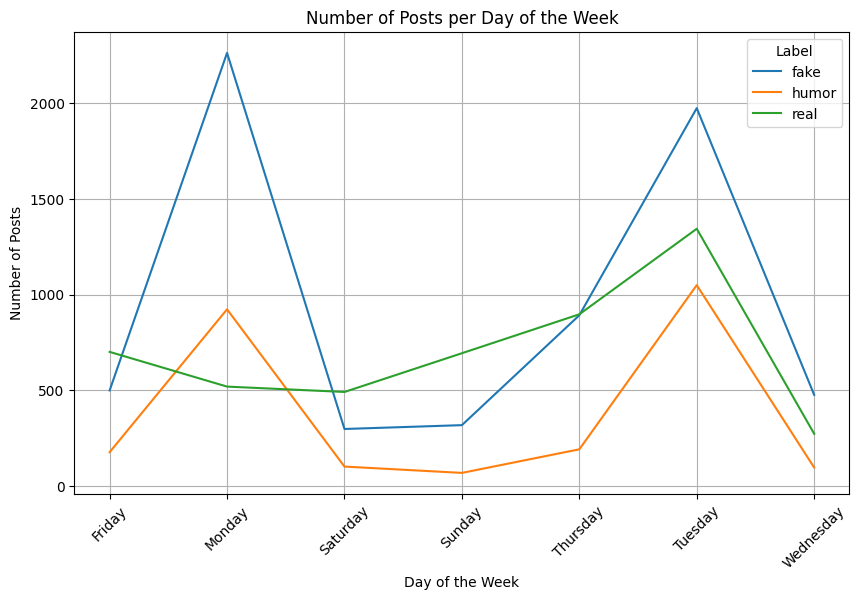

In [205]:


# Sample data preparation (replace this with your actual DataFrame)
# posts_per_day_label = pd.DataFrame({'real': [10, 15, 14, 13, 12, 11, 9],
#                                     'fake': [5, 7, 6, 8, 5, 4, 6]}, 
#                                    index=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plotting
plt.figure(figsize=(10, 6))
for label in posts_per_day_label.index:
    plt.plot(posts_per_day_label.columns, posts_per_day_label.loc[label], label=label)

plt.title('Number of Posts per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.legend(title='Label')
plt.grid(True)
plt.show()


In [206]:
testing_data.head()

,tweetId,tweetText,userId,imageId(s),username,timestamp,label
0,578854927457349632,kereeen RT @Shyman33: Eclipse from ISS.... htt...,70824972,eclipse_01,peay_s,Fri Mar 20 09:45:43 +0000 2015,fake
1,578874632670953472,Absolutely beautiful! RT @Shyman33: Eclipse fr...,344707006,eclipse_01,JaredUcanChange,Fri Mar 20 11:04:02 +0000 2015,fake
2,578891261353984000,“@Shyman33: Eclipse from ISS.... http://t.co/C...,224839607,eclipse_01,tpjp1231,Fri Mar 20 12:10:06 +0000 2015,fake
3,578846612312748032,Eclipse from ISS.... http://t.co/En87OtvsU6,134543073,eclipse_01,Shyman33,Fri Mar 20 09:12:41 +0000 2015,fake
4,578975333841551360,@ebonfigli: Éclipse vue de l'ISS... Autre chos...,1150728872,eclipse_01,Epimethee_,Fri Mar 20 17:44:11 +0000 2015,fake


In [207]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14254 entries, 0 to 14253
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype                  
---  ------       --------------  -----                  
 0   tweetId      14254 non-null  int64                  
 1   tweetText    14254 non-null  object                 
 2   userId       14254 non-null  int64                  
 3   imageId(s)   14254 non-null  object                 
 4   username     14254 non-null  object                 
 5   timestamp    14254 non-null  object                 
 6   label        14254 non-null  object                 
 7   date         14254 non-null  datetime64[ns, tzutc()]
 8   day_of_week  14254 non-null  object                 
dtypes: datetime64[ns, tzutc()](1), int64(2), object(6)
memory usage: 1.1+ MB


In [208]:
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweetId     3755 non-null   int64 
 1   tweetText   3755 non-null   object
 2   userId      3755 non-null   int64 
 3   imageId(s)  3755 non-null   object
 4   username    3755 non-null   object
 5   timestamp   3755 non-null   object
 6   label       3755 non-null   object
dtypes: int64(2), object(5)
memory usage: 205.5+ KB


In [209]:
training_data.rename(columns={'imageId(s)': 'imgs'}, inplace = True)
testing_data.rename(columns={'imageId(s)': 'imgs'}, inplace = True)
training_data.head()

,tweetId,tweetText,userId,imgs,username,timestamp,label,date,day_of_week
0,263046056240115712,¿Se acuerdan de la película: “El día después d...,21226711,sandyA_fake_46,iAnnieM,Mon Oct 29 22:34:01 +0000 2012,fake,2012-10-29 22:34:01+00:00,Monday
1,262995061304852481,@milenagimon: Miren a Sandy en NY! Tremenda i...,192378571,sandyA_fake_09,CarlosVerareal,Mon Oct 29 19:11:23 +0000 2012,fake,2012-10-29 19:11:23+00:00,Monday
2,262979898002534400,"Buena la foto del Huracán Sandy, me recuerda a...",132303095,sandyA_fake_09,LucasPalape,Mon Oct 29 18:11:08 +0000 2012,fake,2012-10-29 18:11:08+00:00,Monday
3,262996108400271360,Scary shit #hurricane #NY http://t.co/e4JLBUfH,241995902,sandyA_fake_29,Haaaaarryyy,Mon Oct 29 19:15:33 +0000 2012,fake,2012-10-29 19:15:33+00:00,Monday
4,263018881839411200,My fave place in the world #nyc #hurricane #sa...,250315890,sandyA_fake_15,princess__natt,Mon Oct 29 20:46:02 +0000 2012,fake,2012-10-29 20:46:02+00:00,Monday


In [210]:
training_counts = training_data['label'].value_counts()
training_counts

label
fake     6719
real     4921
humor    2614
Name: count, dtype: int64

In [211]:
testing_counts = testing_data['label'].value_counts()
testing_counts

label
fake    2546
real    1209
Name: count, dtype: int64

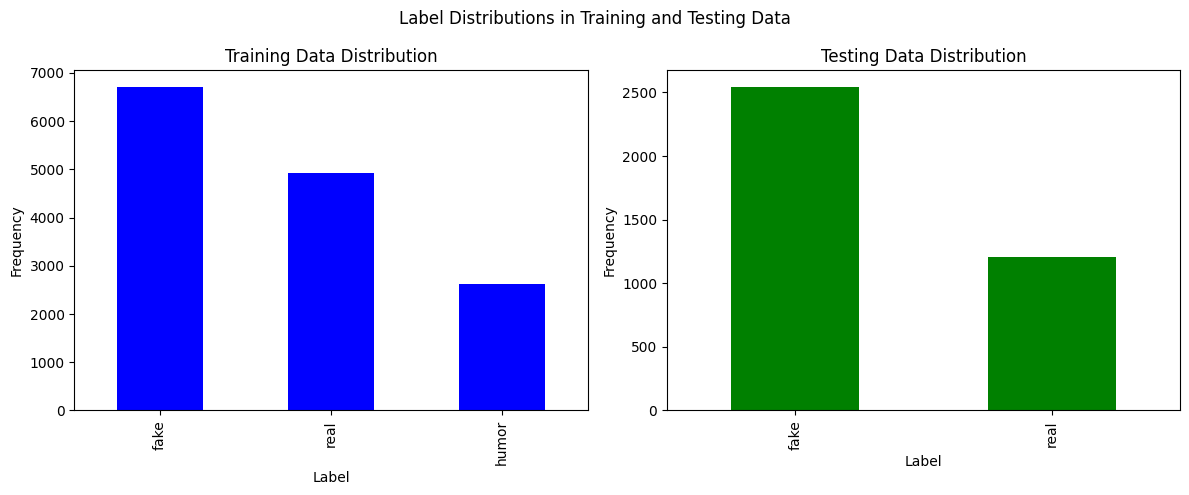

In [212]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot Training Data Distribution
training_data['label'].value_counts().plot(kind='bar', ax=axes[0], title='Training Data Distribution', color='blue')
axes[0].set_xlabel('Label')
axes[0].set_ylabel('Frequency')

# Plot Testing Data Distribution
testing_data['label'].value_counts().plot(kind='bar', ax=axes[1], title='Testing Data Distribution', color='green')
axes[1].set_xlabel('Label')
axes[1].set_ylabel('Frequency')

# Add a title to the figure
plt.suptitle('Label Distributions in Training and Testing Data')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()


In [213]:
training_data["tweetText"].describe()

count                                                 14254
unique                                                12353
top       Unbelievable scene flying over #StatenIsland i...
freq                                                     42
Name: tweetText, dtype: object

## Data Vizulaization



In [214]:
training_data['label'] = training_data['label'].apply(lambda x: 1 if x in ['fake', 'humor'] else 0)
testing_data['label'] = testing_data['label'].apply(lambda x: 1 if x in ['fake', 'humor'] else 0)


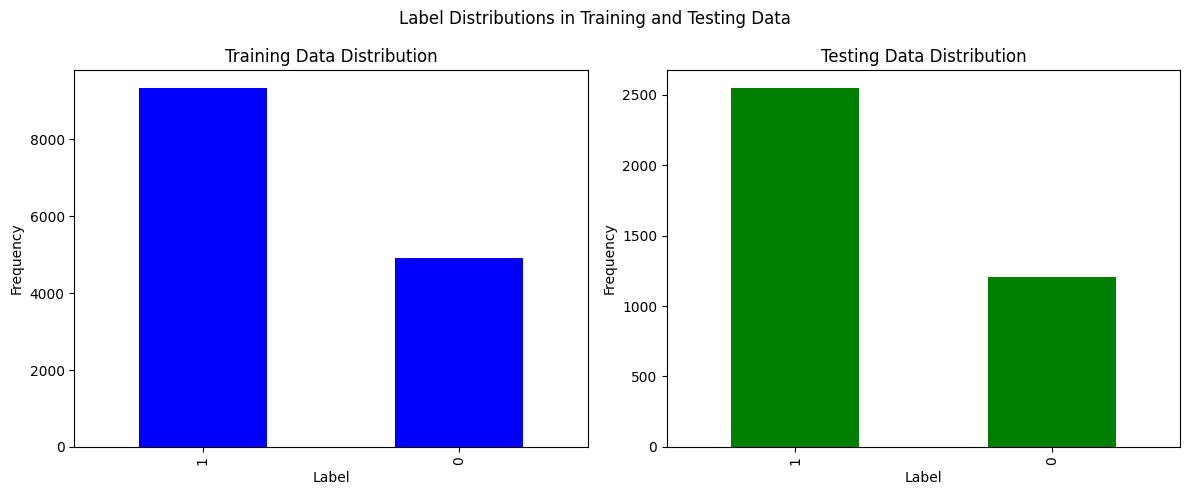

In [215]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot Training Data Distribution
training_data['label'].value_counts().plot(kind='bar', ax=axes[0], title='Training Data Distribution', color='blue')
axes[0].set_xlabel('Label')
axes[0].set_ylabel('Frequency')

# Plot Testing Data Distribution
testing_data['label'].value_counts().plot(kind='bar', ax=axes[1], title='Testing Data Distribution', color='green')
axes[1].set_xlabel('Label')
axes[1].set_ylabel('Frequency')

# Add a title to the figure
plt.suptitle('Label Distributions in Training and Testing Data')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

In [216]:
# Assuming train_data is your DataFrame and it already has a column 'tweetText'
# Calculate the length of each tweet
training_data['length'] = training_data['tweetText'].str.len()
training_data["length"].describe()

count    14254.00000
mean        91.61723
std        111.12367
min         26.00000
25%         61.00000
50%         88.00000
75%        119.00000
max       7125.00000
Name: length, dtype: float64

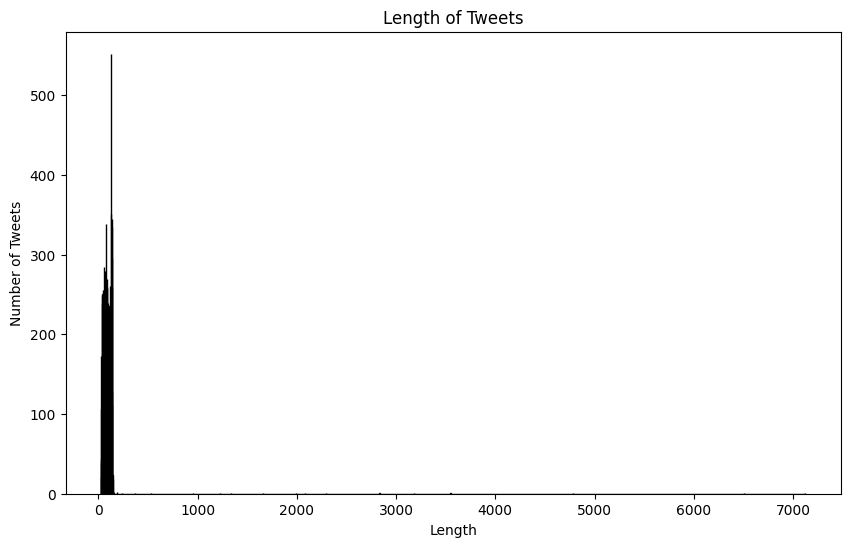

In [217]:

# Create a histogram using Matplotlib
plt.figure(figsize=(10, 6))
plt.hist(training_data['length'], bins=5000, color='skyblue', edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Length of Tweets')
plt.xlabel('Length')
plt.ylabel('Number of Tweets')
plt.show()

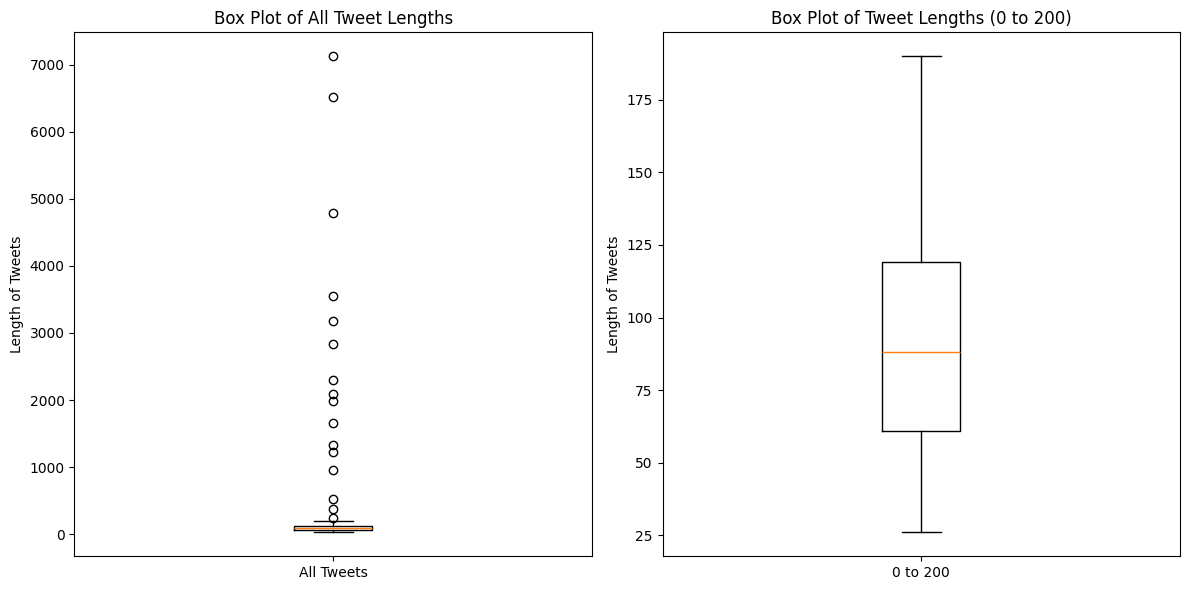

In [218]:

# Calculate the length of each tweet
training_data['length'] = training_data['tweetText'].str.len()

# Create a figure and a set of subplots (1 row, 2 columns)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Box plot for all tweet lengths
axes[0].boxplot(training_data['length'])
axes[0].set_title('Box Plot of All Tweet Lengths')
axes[0].set_ylabel('Length of Tweets')
axes[0].set_xticklabels(['All Tweets'])

# Filter the data for lengths from 0 to 200
filtered_data = training_data[training_data['length'] <= 200]

# Box plot for filtered tweet lengths (0 to 200)
axes[1].boxplot(filtered_data['length'])
axes[1].set_title('Box Plot of Tweet Lengths (0 to 200)')
axes[1].set_ylabel('Length of Tweets')
axes[1].set_xticklabels(['0 to 200'])

# Show the plot
plt.tight_layout()
plt.show()



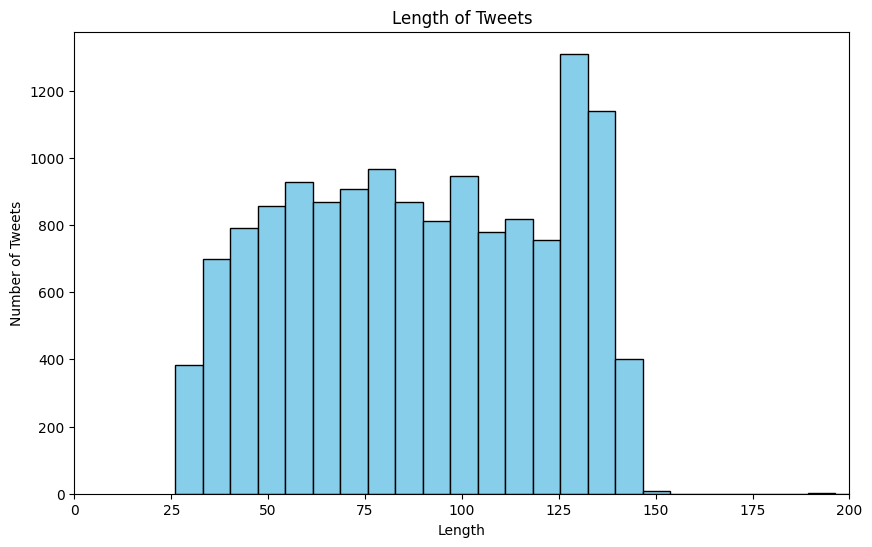

In [219]:
plt.figure(figsize=(10, 6))
plt.hist(training_data['length'], bins=1000, color='skyblue', edgecolor='black')
plt.title('Length of Tweets')
plt.xlabel('Length')
plt.ylabel('Number of Tweets')
plt.xlim(0, 200)  # Set the x-axis range from 0 to 200
plt.show()

In [227]:
print(training_data.head())


              tweetId                                          tweetText  \
0  263046056240115712  ¿Se acuerdan de la película: “El día después d...   
1  262995061304852481  @milenagimon: Miren a Sandy en NY!  Tremenda i...   
2  262979898002534400  Buena la foto del Huracán Sandy, me recuerda a...   
3  262996108400271360     Scary shit #hurricane #NY http://t.co/e4JLBUfH   
4  263018881839411200  My fave place in the world #nyc #hurricane #sa...   

      userId            imgs        username                       timestamp  \
0   21226711  sandyA_fake_46         iAnnieM  Mon Oct 29 22:34:01 +0000 2012   
1  192378571  sandyA_fake_09  CarlosVerareal  Mon Oct 29 19:11:23 +0000 2012   
2  132303095  sandyA_fake_09     LucasPalape  Mon Oct 29 18:11:08 +0000 2012   
3  241995902  sandyA_fake_29     Haaaaarryyy  Mon Oct 29 19:15:33 +0000 2012   
4  250315890  sandyA_fake_15  princess__natt  Mon Oct 29 20:46:02 +0000 2012   

   label                      date day_of_week  length categor

C:\Users\jimmy\AppData\Local\Temp\ipykernel_4360\1761690977.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_data = training_data.groupby(['category', length_bins]).size().unstack(fill_value=0)


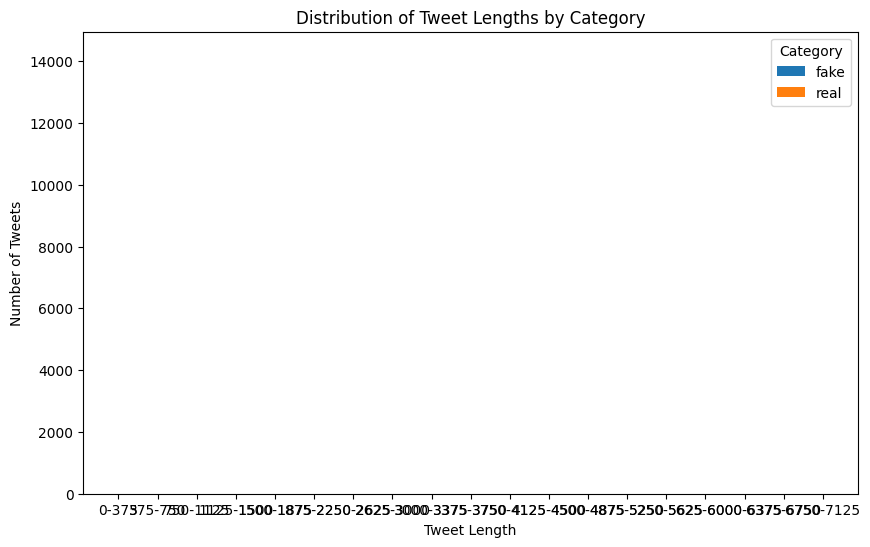

In [230]:

# Assume 'training_data' has a 'length' column and a numeric 'label' column
# First, map the numeric labels to strings if necessary
label_mapping = {0: 'real', 1: 'fake', 2: 'humor'}  # Update this mapping based on your data
training_data['category'] = training_data['label'].map(label_mapping)

# Define the bins for tweet lengths
bins = np.linspace(0, training_data['length'].max(), 20)  # Adjust the number of bins as needed

# Create a DataFrame to store the count in each bin for each category
length_bins = pd.cut(training_data['length'], bins=bins, include_lowest=True)
binned_data = training_data.groupby(['category', length_bins]).size().unstack(fill_value=0)

# Transpose the DataFrame to have categories as columns and length bins as rows
binned_data = binned_data.T

# Plotting
plt.figure(figsize=(10, 6))

# Bottom of the bar segments
cumulative = np.zeros(len(binned_data))

# Plot each category
for category in binned_data.columns:
    # Calculate the midpoints of the bins
    midpoints = [interval.mid for interval in binned_data.index]
    plt.bar(midpoints, binned_data[category], bottom=cumulative, label=category)
    cumulative += binned_data[category].values

plt.title('Distribution of Tweet Lengths by Category')
plt.xlabel('Tweet Length')
plt.ylabel('Number of Tweets')
plt.xticks(ticks=midpoints, labels=[f"{int(interval.left)}-{int(interval.right)}" for interval in binned_data.index])
plt.legend(title='Category')
plt.show()




571      In the driving rain of Hurricane Sandy, soldie...
1803     Shark in the street, New Jersey... #HurricaneS...
2516     @Prisfdez La estatua de la Libertad y el Hurac...
2642     This picture was taken in New Jersey earlier. ...
2675     This picture was taken in New Jersey earlier. ...
4000     This can't be real...RT @ropgrady: \355\240\27...
4192     That bitch Sandy comin! Lol http://t.co/ibgNKk...
4380     @joluisgarcia: El llamado fue que todos se res...
6571     @KimberlyAngelaY: Hurricane Sandy entering New...
6573     since 1937, the tomb soldiers have never left ...
8638     And lo, I am with you always, even to the end ...
9186     el mar se metio a Manhatan #EnEsteMomento #San...
9418     Rising water, caused by #Sandy, rushes into a ...
9953     Thank goodness for people who are kind  #sandy...
11401    Dear Mainstream Media - #Cuba is also affected...
13233    @AwkwardGoogle: Underwater bedroom at Poseidon...
Name: tweetText, dtype: object


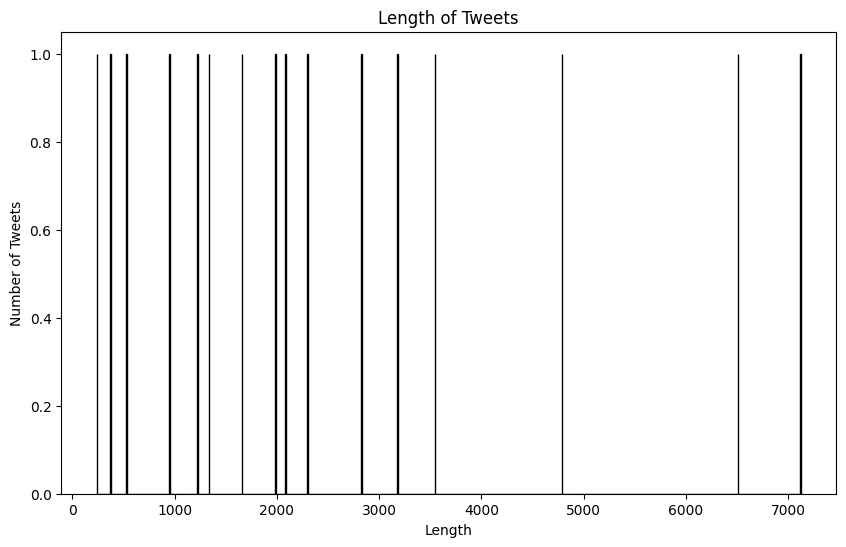

In [194]:
plt.figure(figsize=(10, 6))
long_tweets = training_data[training_data['length'] > 200]
print(long_tweets["tweetText"])
plt.hist(long_tweets["length"], bins=1000, color='skyblue', edgecolor='black')
plt.title('Length of Tweets')
plt.xlabel('Length')
plt.ylabel('Number of Tweets')

plt.show()

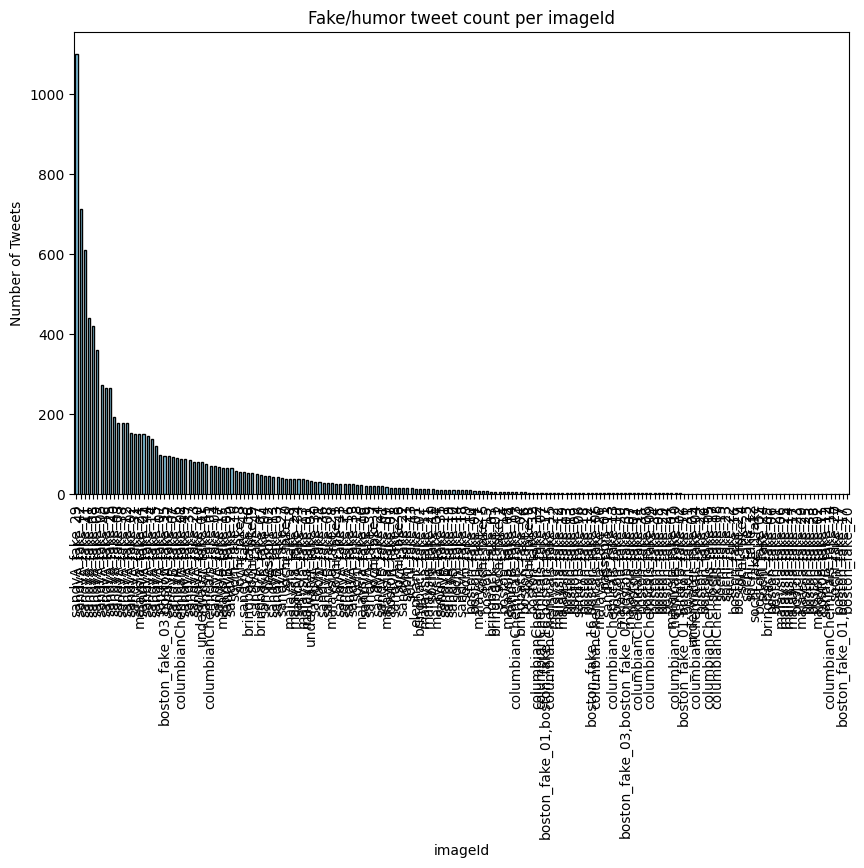

In [195]:
# Filter the data to include only fake/humor tweets
fake_tweets = training_data[training_data['label'] == 1]

# Count the number of fake tweets per imageId
imageId_counts = fake_tweets['imgs'].value_counts().sort_values(ascending=False)

# Create a bar plot using Matplotlib
plt.figure(figsize=(10, 6))
imageId_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Set the title and labels
plt.title('Fake/humor tweet count per imageId')
plt.xlabel('imageId')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


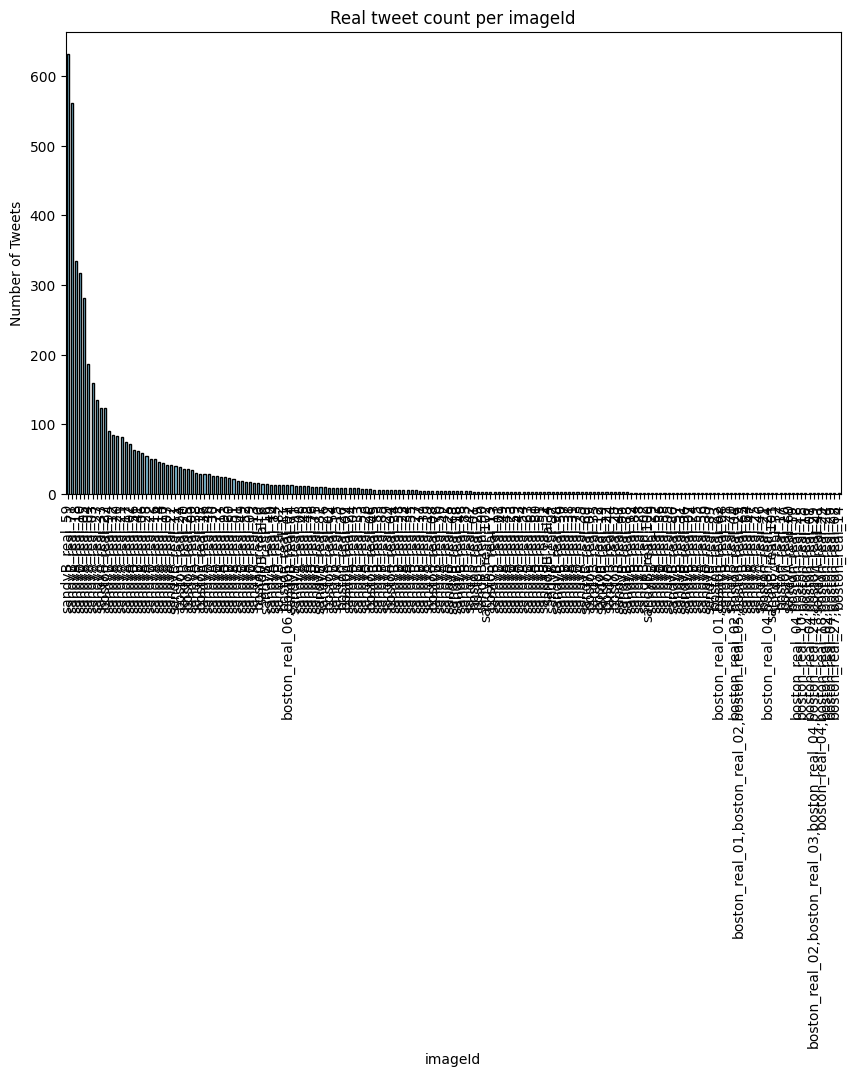

In [196]:
# Filter the data to include only fake/humor tweets
fake_tweets = training_data[training_data['label'] == 0]

# Count the number of fake tweets per imageId
imageId_counts = fake_tweets['imgs'].value_counts().sort_values(ascending=False)

# Create a bar plot using Matplotlib
plt.figure(figsize=(10, 6))
imageId_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Set the title and labels
plt.title('Real tweet count per imageId')
plt.xlabel('imageId')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [197]:


# Sample DataFrame (replace this with your actual DataFrame)
# df = pd.DataFrame({'imgs': ['image1_name.jpg,image2_name.jpg', 'image3_name.jpg,image4_name.jpg']})

def process_img_names(img_names):
    if isinstance(img_names, str):
        # Split each image name at the first underscore and take the first part
        processed_names = [img.split('_')[0] for img in img_names.split(',')]
        # Join the processed names back into a single string separated by commas
        return ','.join(processed_names)
    else:
        # Return empty string or NaN if the original value is not a string
        return ''

# Apply the function to the imgs column
training_data['short_imgs'] = training_data['imgs'].apply(process_img_names)



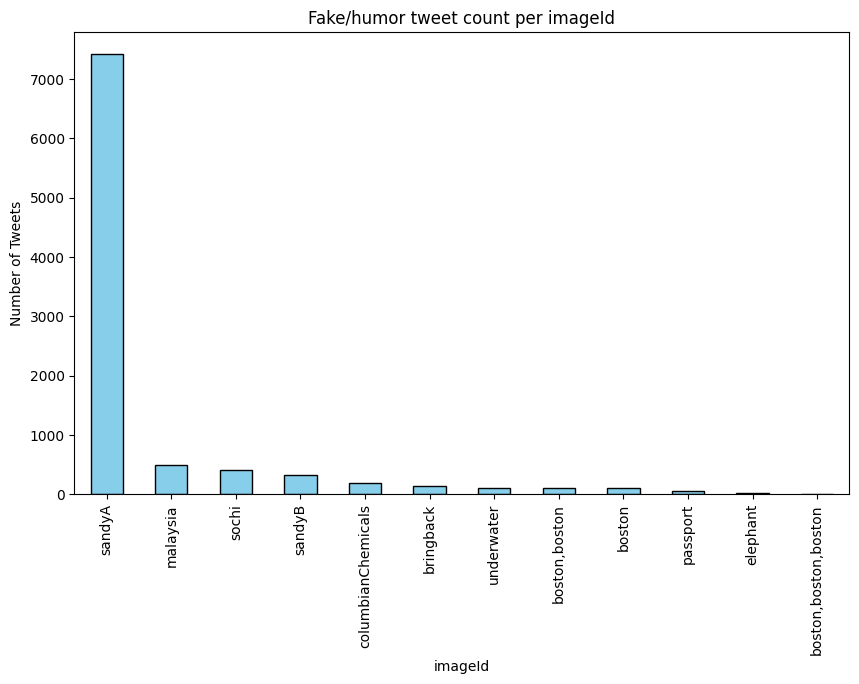

In [199]:
# Filter the data to include only fake/humor tweets
fake_tweets = training_data[training_data['label'] == 1]

# Count the number of fake tweets per imageId
imageId_counts = fake_tweets['short_imgs'].value_counts().sort_values(ascending=False)

# Create a bar plot using Matplotlib
plt.figure(figsize=(10, 6))
imageId_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Set the title and labels
plt.title('Fake/humor tweet count per imageId')
plt.xlabel('imageId')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

## Data Preprocessing


In [54]:
training_data.iloc[2434]

tweetId                                     263978058321641472
tweetText    Esta foto si que se pasó. Tiburones en una est...
userId                                                79345492
imgs                                            sandyB_fake_07
username                                             Catacorts
timestamp                       Thu Nov 01 12:17:28 +0000 2012
label                                                        1
length                                                     135
Name: 2434, dtype: object

In [55]:



longTweets = training_data[training_data['length'] > 200]
print(longTweets.head())

print(longTweets["tweetText"].describe())



                 tweetId                                          tweetText  \
571   262987209144160257  In the driving rain of Hurricane Sandy, soldie...   
1803  263035425176834048  Shark in the street, New Jersey... #HurricaneS...   
2516  264772679343693824  @Prisfdez La estatua de la Libertad y el Hurac...   
2642  264215276827066368  This picture was taken in New Jersey earlier. ...   
2675  264205456237527040  This picture was taken in New Jersey earlier. ...   

         userId            imgs      username                       timestamp  \
571   158602370  sandyA_fake_49    LanaCeleen  Mon Oct 29 17:42:32 +0000 2012   
1803   37489301  sandyA_fake_11  branDwitaEyE  Tue Oct 30 02:56:50 +0000 2012   
2516  291701440  sandyA_fake_41        87Keka  Thu Nov 01 10:16:05 +0000 2012   
2642  842385108  sandyA_fake_11     Court6977  Thu Nov 01 03:53:10 +0000 2012   
2675  595805197  sandyA_fake_04      Dylan_B8  Mon Nov 05 04:35:22 +0000 2012   

      label  length  
571       1    1

In [56]:
#Cut of point editied for best result
# Filter out rows where 'length' is greater than or equal to 240
training_data = training_data[training_data['length'] < 240]

# Reset the index to be continuous
training_data.reset_index(drop=True, inplace=True)


## Tranllsation


In [57]:
training_data.head()

,tweetId,tweetText,userId,imgs,username,timestamp,label,length
0,263046056240115712,¿Se acuerdan de la película: “El día después d...,21226711,sandyA_fake_46,iAnnieM,Mon Oct 29 22:34:01 +0000 2012,1,134
1,262995061304852481,@milenagimon: Miren a Sandy en NY! Tremenda i...,192378571,sandyA_fake_09,CarlosVerareal,Mon Oct 29 19:11:23 +0000 2012,1,133
2,262979898002534400,"Buena la foto del Huracán Sandy, me recuerda a...",132303095,sandyA_fake_09,LucasPalape,Mon Oct 29 18:11:08 +0000 2012,1,116
3,262996108400271360,Scary shit #hurricane #NY http://t.co/e4JLBUfH,241995902,sandyA_fake_29,Haaaaarryyy,Mon Oct 29 19:15:33 +0000 2012,1,46
4,263018881839411200,My fave place in the world #nyc #hurricane #sa...,250315890,sandyA_fake_15,princess__natt,Mon Oct 29 20:46:02 +0000 2012,1,89


In [58]:


def basicPreProcessing(text):
    #Making the text lowercase
    text = text.lower()

    #Removing the urls
    text = re.sub("http\S+", "", text)

    #Removing the punctuations and other symbols
    text = re.sub('[^\w\s]', '', text)




    return text


training_data['cleanText'] = training_data['tweetText'].apply(basicPreProcessing)
testing_data['cleanText'] = testing_data['tweetText'].apply(basicPreProcessing)


training_data.head()




,tweetId,tweetText,userId,imgs,username,timestamp,label,length,cleanText
0,263046056240115712,¿Se acuerdan de la película: “El día después d...,21226711,sandyA_fake_46,iAnnieM,Mon Oct 29 22:34:01 +0000 2012,1,134,se acuerdan de la película el día después de m...
1,262995061304852481,@milenagimon: Miren a Sandy en NY! Tremenda i...,192378571,sandyA_fake_09,CarlosVerareal,Mon Oct 29 19:11:23 +0000 2012,1,133,milenagimon miren a sandy en ny tremenda imag...
2,262979898002534400,"Buena la foto del Huracán Sandy, me recuerda a...",132303095,sandyA_fake_09,LucasPalape,Mon Oct 29 18:11:08 +0000 2012,1,116,buena la foto del huracán sandy me recuerda a ...
3,262996108400271360,Scary shit #hurricane #NY http://t.co/e4JLBUfH,241995902,sandyA_fake_29,Haaaaarryyy,Mon Oct 29 19:15:33 +0000 2012,1,46,scary shit hurricane ny
4,263018881839411200,My fave place in the world #nyc #hurricane #sa...,250315890,sandyA_fake_15,princess__natt,Mon Oct 29 20:46:02 +0000 2012,1,89,my fave place in the world nyc hurricane sandy...


In [59]:
training_data.drop_duplicates(subset=['cleanText'], keep='first', inplace=True, ignore_index = True)
training_data["cleanText"].describe()

count                                                 11444
unique                                                11444
top       se acuerdan de la película el día después de m...
freq                                                      1
Name: cleanText, dtype: object

In [60]:
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException

# Set seed for langdetect to get consistent results
DetectorFactory.seed = 0

# Sample DataFrame (replace this with your actual DataFrame)
# df = pd.DataFrame({'tweetText': ['This is an English text.', 'Este es un texto en español.']})

# Define a function to detect language
def detect_language(text):
    try:
        return detect(text)
    except LangDetectException:
        return 'unknown'

# Apply the function to your DataFrame
training_data['lang'] = training_data['cleanText'].apply(detect_language)

# Display the DataFrame
print(training_data.head())


              tweetId                                          tweetText  \
0  263046056240115712  ¿Se acuerdan de la película: “El día después d...   
1  262995061304852481  @milenagimon: Miren a Sandy en NY!  Tremenda i...   
2  262979898002534400  Buena la foto del Huracán Sandy, me recuerda a...   
3  262996108400271360     Scary shit #hurricane #NY http://t.co/e4JLBUfH   
4  263018881839411200  My fave place in the world #nyc #hurricane #sa...   

      userId            imgs        username                       timestamp  \
0   21226711  sandyA_fake_46         iAnnieM  Mon Oct 29 22:34:01 +0000 2012   
1  192378571  sandyA_fake_09  CarlosVerareal  Mon Oct 29 19:11:23 +0000 2012   
2  132303095  sandyA_fake_09     LucasPalape  Mon Oct 29 18:11:08 +0000 2012   
3  241995902  sandyA_fake_29     Haaaaarryyy  Mon Oct 29 19:15:33 +0000 2012   
4  250315890  sandyA_fake_15  princess__natt  Mon Oct 29 20:46:02 +0000 2012   

   label  length                                          clea

In [61]:
training_data[training_data['lang'] == 'en'].count()

tweetId      8615
tweetText    8615
userId       8615
imgs         8615
username     8615
timestamp    8615
label        8615
length       8615
cleanText    8615
lang         8615
dtype: int64

In [62]:


rows_that_need_translation = training_data[training_data['lang'] != 'en']
rows_that_need_translation.head()

,tweetId,tweetText,userId,imgs,username,timestamp,label,length,cleanText,lang
0,263046056240115712,¿Se acuerdan de la película: “El día después d...,21226711,sandyA_fake_46,iAnnieM,Mon Oct 29 22:34:01 +0000 2012,1,134,se acuerdan de la película el día después de m...,es
1,262995061304852481,@milenagimon: Miren a Sandy en NY! Tremenda i...,192378571,sandyA_fake_09,CarlosVerareal,Mon Oct 29 19:11:23 +0000 2012,1,133,milenagimon miren a sandy en ny tremenda imag...,es
2,262979898002534400,"Buena la foto del Huracán Sandy, me recuerda a...",132303095,sandyA_fake_09,LucasPalape,Mon Oct 29 18:11:08 +0000 2012,1,116,buena la foto del huracán sandy me recuerda a ...,es
13,262990978611286016,Good luck #ny #newyork #usa #hurricane #sandy ...,125724906,sandyA_fake_29,gsevigny,Mon Oct 29 18:55:10 +0000 2012,1,66,good luck ny newyork usa hurricane sandy,cy
35,263422787513901056,Mans best friend #love #hurricane #sandy #dog ...,174085679,sandyA_fake_21,CafeBustelo711,Tue Oct 30 23:31:01 +0000 2012,1,66,mans best friend love hurricane sandy dog,da


In [63]:
rows_that_need_translation['lang'].value_counts()

lang
es         1061
tl          265
cy          170
fr          158
id          147
pt          137
af          105
so           96
it           83
nl           58
sv           56
pl           54
ar           53
da           53
ru           38
no           37
ca           34
tr           32
sk           27
fi           21
et           18
de           16
ja           15
th           13
sq           13
sl           10
bg            7
hu            5
lt            5
ro            5
vi            5
sw            5
ko            4
el            4
zh-cn         4
cs            3
fa            3
hr            3
mk            2
he            1
lv            1
unknown       1
hi            1
Name: count, dtype: int64

In [31]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

tokenizer = AutoTokenizer.from_pretrained("facebook/mbart-large-50-many-to-many-mmt")
model = AutoModelForSeq2SeqLM.from_pretrained("facebook/mbart-large-50-many-to-many-mmt")

def batch_translate(texts):
    # Tokenize the texts and prepare for model input
    tokenized = tokenizer(texts, return_tensors="pt", padding=True, truncation=True)
    # Translate and decode the output
    translated = model.generate(**tokenized)
    return [tokenizer.decode(t, skip_special_tokens=True) for t in translated]

# Filter rows that need translation
rows_that_need_translation = training_data[training_data['lang'] != 'en']

# Batch translation
batch_size = 10  # Adjust based on your resource constraints
translated_texts = []
for i in range(0, len(rows_that_need_translation), batch_size):
    batch = rows_that_need_translation['cleanText'][i:i+batch_size].tolist()
    translated_texts.extend(batch_translate(batch))

# Combine the translated texts back into the original DataFrame
training_data.loc[rows_that_need_translation.index, 'translated_text'] = translated_texts

# For rows that are already in English, copy the original text
training_data.loc[training_data['lang'] == 'en', 'translated_text'] = training_data['cleanText']

# View the first few rows of the training data
training_data.head()





model.safetensors: 100%|██████████| 2.44G/2.44G [01:25<00:00, 28.6MB/s]
generation_config.json: 100%|██████████| 261/261 [00:00<00:00, 65.2kB/s]
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


KeyboardInterrupt: 

In [34]:


def contains_emoji(text):
    # Regular expression to match emojis
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    return bool(emoji_pattern.search(text))

# Apply the function to the 'tweetText' column to create a new boolean column
training_data['contains_emoji'] = training_data['cleanText'].apply(contains_emoji)

# Summarize the results
emoji_presence_summary = training_data['contains_emoji'].value_counts()
emoji_presence_summary


contains_emoji
False    11390
True        54
Name: count, dtype: int64

In [ ]:
training_data[training_data['contains_emoji'] == True].head(10)

,tweetId,tweetText,userId,imgs,username,timestamp,label,length,cleanText,contains_emoji
158,263060279619903490,FaceBookでshareされまくってる画像。\n#sandy #ny #nyc #hur...,84016285,sandyA_fake_29,shokochaaaaan,Mon Oct 29 23:30:32 +0000 2012,1,73,facebookでshareされまくってる画像nsandy ny nyc hurricane,True
786,263112730880393216,【画像】アメリカ東海岸を襲ったハリケーン『サンディ』の被害 現地からの写真 #Sandy -...,183891902,sandyA_fake_09,tennjinnume,Tue Oct 30 02:58:58 +0000 2012,1,98,画像アメリカ東海岸を襲ったハリケーンサンディの被害 現地からの写真 sandy naver...,True
1357,263230327202385921,最早ハリウッド #sandy we respect your power. Be grate...,177594691,sandyA_fake_46,gakusei_b,Tue Oct 30 10:46:15 +0000 2012,1,107,最早ハリウッド sandy we respect your power be gratefu...,True
1472,263168991688814593,"죽음의 그늘, 뉴욕.\n #Sandy http://t.co/xZut20MF",145994704,sandyA_fake_09,bioleter,Tue Oct 30 06:42:31 +0000 2012,1,41,죽음의 그늘 뉴욕n sandy,True
2061,264044934238199808,상어 상어 ! “@Anel_K: Sharks seen roaming in New J...,430315265,sandyB_fake_07,jo_c0,Thu Nov 01 16:43:12 +0000 2012,1,108,상어 상어 anel_k sharks seen roaming in new jerse...,True
2436,264709413808517120,"Lolll ツ ""@mariejoelle: A friend sent me this. ...",415187845,sandyA_fake_41,lilie1971,Sat Nov 03 12:43:36 +0000 2012,1,102,lolll ツ mariejoelle a friend sent me this made...,True
2601,263834874492899329,Sandy 在以每小时近100英里风速袭击美东的时候，镇守在阿灵顿无名战士公墓的军人拒绝离岗...,126024025,sandyA_fake_03,mille_yin,Thu Nov 01 02:48:30 +0000 2012,1,132,sandy 在以每小时近100英里风速袭击美东的时候镇守在阿灵顿无名战士公墓的军人拒绝离岗这...,True
2638,263964914748645377,NYがハリケーン「サンディ」により大水没1万リツイート！実はガセでした：NY is retw...,145147822,sandyA_fake_09,tomotarou33,Thu Nov 01 11:25:14 +0000 2012,1,138,nyがハリケーンサンディにより大水没1万リツイート実はガセでしたny is retweete...,True
2995,264527458160738307,ハリケーンSandyの映像、まるで映画そのまんまですね。こわ！ http://t.co/UW...,15710868,sandyA_fake_07,ykk0715,Sat Nov 03 00:40:35 +0000 2012,1,52,ハリケーンsandyの映像まるで映画そのまんまですねこわ,True
3008,264215676342898689,大型台風Sandyすごすぎ、映画みたいじゃない？ http://t.co/I3b1wjou,379791816,sandyA_fake_08,arqt1c,Fri Nov 02 04:01:41 +0000 2012,1,45,大型台風sandyすごすぎ映画みたいじゃない,True


In [64]:
stopwords = nltk.corpus.stopwords.words()
stopwords.extend([':', ';', '[', ']', '"', "'", '(', ')', '.', '?', '#', '@', '...'])

training_data["cleanText"] = training_data["cleanText"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
testing_data["cleanText"] = testing_data["cleanText"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))



In [67]:
training_data.head()

,tweetId,tweetText,userId,imgs,username,timestamp,label,length,cleanText,lang
0,263046056240115712,¿Se acuerdan de la película: “El día después d...,21226711,sandyA_fake_46,iAnnieM,Mon Oct 29 22:34:01 +0000 2012,1,134,acuerdan película día después mañana recuerda ...,es
1,262995061304852481,@milenagimon: Miren a Sandy en NY! Tremenda i...,192378571,sandyA_fake_09,CarlosVerareal,Mon Oct 29 19:11:23 +0000 2012,1,133,milenagimon miren sandy ny tremenda imagen hur...,es
2,262979898002534400,"Buena la foto del Huracán Sandy, me recuerda a...",132303095,sandyA_fake_09,LucasPalape,Mon Oct 29 18:11:08 +0000 2012,1,116,buena foto huracán sandy recuerda película día...,es
3,262996108400271360,Scary shit #hurricane #NY http://t.co/e4JLBUfH,241995902,sandyA_fake_29,Haaaaarryyy,Mon Oct 29 19:15:33 +0000 2012,1,46,scary shit hurricane ny,en
4,263018881839411200,My fave place in the world #nyc #hurricane #sa...,250315890,sandyA_fake_15,princess__natt,Mon Oct 29 20:46:02 +0000 2012,1,89,fave place world nyc hurricane sandy statueofl...,en


In [66]:

nltk.download('wordnet')

tokeniser = nltk.tokenize.WhitespaceTokenizer()
lemmatiser = nltk.stem.WordNetLemmatizer()

training_data['cleanText'] = training_data['cleanText'].apply(lambda x: ' '.join([lemmatiser.lemmatize(w) for w in tokeniser.tokenize(x)]))
training_data.head(10)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jimmy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,tweetId,tweetText,userId,imgs,username,timestamp,label,length,cleanText,lang
0,263046056240115712,¿Se acuerdan de la película: “El día después d...,21226711,sandyA_fake_46,iAnnieM,Mon Oct 29 22:34:01 +0000 2012,1,134,acuerdan película día después mañana recuerda ...,es
1,262995061304852481,@milenagimon: Miren a Sandy en NY! Tremenda i...,192378571,sandyA_fake_09,CarlosVerareal,Mon Oct 29 19:11:23 +0000 2012,1,133,milenagimon miren sandy ny tremenda imagen hur...,es
2,262979898002534400,"Buena la foto del Huracán Sandy, me recuerda a...",132303095,sandyA_fake_09,LucasPalape,Mon Oct 29 18:11:08 +0000 2012,1,116,buena foto huracán sandy recuerda película día...,es
3,262996108400271360,Scary shit #hurricane #NY http://t.co/e4JLBUfH,241995902,sandyA_fake_29,Haaaaarryyy,Mon Oct 29 19:15:33 +0000 2012,1,46,scary shit hurricane ny,en
4,263018881839411200,My fave place in the world #nyc #hurricane #sa...,250315890,sandyA_fake_15,princess__natt,Mon Oct 29 20:46:02 +0000 2012,1,89,fave place world nyc hurricane sandy statueofl...,en
5,263364439582060545,42nd #time #square #NYC #subway #hurricane htt...,163674788,sandyA_fake_23,classycg,Tue Oct 30 19:39:10 +0000 2012,1,63,42nd time square nyc subway hurricane,en
6,262927032705490944,Just in time for #halloween a photo of #hurric...,246153081,sandyA_fake_14,j_unit87,Mon Oct 29 14:41:04 +0000 2012,1,91,time halloween photo hurricane sandy frankenstorm,en
7,263321078884077568,Crazy pic of #Hurricane #Sandy prayers go out ...,199565482,sandyA_fake_29,MrBlakMagik,Tue Oct 30 16:46:52 +0000 2012,1,106,crazy hurricane sandy prayer family friend eas...,en
8,263111677485142017,#sandy #newyork #hurricane #statueofliberty #U...,78475739,sandyA_fake_15,safi37,Tue Oct 30 02:54:46 +0000 2012,1,69,sandy newyork hurricane statueofliberty usa,en
9,262977091983785985,#nyc #hurricane http://t.co/Gv3QxZlq,869777653,sandyA_fake_29,kingmichael03,Mon Oct 29 17:59:59 +0000 2012,1,36,nyc hurricane,en


In [121]:
def check_fake(img_name):
    if 'fake' in img_name:
        return 1
    else:
        return 0

# Apply the function to create the 'containsFake' column
testing_data['containsFake'] = testing_data['imgs'].apply(check_fake)
theory_data=testing_data[testing_data['containsFake'] != testing_data['label']]
# theory_data.head()
theory_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2546 entries, 0 to 3754
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   tweetId       2546 non-null   int64 
 1   tweetText     2546 non-null   object
 2   userId        2546 non-null   int64 
 3   imgs          2546 non-null   object
 4   username      2546 non-null   object
 5   timestamp     2546 non-null   object
 6   label         2546 non-null   int64 
 7   cleanText     2546 non-null   object
 8   containsFake  2546 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 198.9+ KB


In [122]:
theory_data.head()


,tweetId,tweetText,userId,imgs,username,timestamp,label,cleanText,containsFake
0,578854927457349632,kereeen RT @Shyman33: Eclipse from ISS.... htt...,70824972,eclipse_01,peay_s,Fri Mar 20 09:45:43 +0000 2015,1,kereeen rt shyman33 eclipse,0
1,578874632670953472,Absolutely beautiful! RT @Shyman33: Eclipse fr...,344707006,eclipse_01,JaredUcanChange,Fri Mar 20 11:04:02 +0000 2015,1,absolutely beautiful rt shyman33 eclipse,0
2,578891261353984000,“@Shyman33: Eclipse from ISS.... http://t.co/C...,224839607,eclipse_01,tpjp1231,Fri Mar 20 12:10:06 +0000 2015,1,shyman33 eclipse 우주에서본 320 일식 wow amazing,0
3,578846612312748032,Eclipse from ISS.... http://t.co/En87OtvsU6,134543073,eclipse_01,Shyman33,Fri Mar 20 09:12:41 +0000 2015,1,eclipse,0
4,578975333841551360,@ebonfigli: Éclipse vue de l'ISS... Autre chos...,1150728872,eclipse_01,Epimethee_,Fri Mar 20 17:44:11 +0000 2015,1,ebonfigli éclipse vue liss autre chose créatio...,0


## Algorithm Design and Training

In [69]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [68]:
training_feature= training_data['cleanText']
testing_feature = testing_data['cleanText']

training_label = training_data['label']
testing_label = testing_data['label']


In [70]:
# Create a CountVectorizer object for bag-of-words
bow_vectorizer = CountVectorizer()
bow_train = bow_vectorizer.fit_transform(training_feature)
bow_test = bow_vectorizer.transform(testing_feature)
bow_train.shape

(11444, 13593)

In [118]:
ngram_vectorizer = CountVectorizer(ngram_range=(1, 3))
ngram_train = ngram_vectorizer.fit_transform(training_feature)
ngram_test = ngram_vectorizer.transform(testing_feature)
print(ngram_train)



AttributeError: 'csr_matrix' object has no attribute 'columns'

In [72]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(training_feature)
tfidf_test = tfidf_vectorizer.transform(testing_feature)
print(tfidf_train[:10])

  (0, 9956)	0.06061927420989363
  (0, 5210)	0.20289772971506173
  (0, 8514)	0.35398218200725134
  (0, 9433)	0.4118529668910845
  (0, 7099)	0.3741138501552311
  (0, 2969)	0.3231090220652148
  (0, 3375)	0.35398218200725134
  (0, 8616)	0.3251810493683365
  (0, 364)	0.4299126077359425
  (1, 9767)	0.14299310766480144
  (1, 9375)	0.19223090876340673
  (1, 5472)	0.3707863693975197
  (1, 8483)	0.31446396639905544
  (1, 5385)	0.25014866510593875
  (1, 11837)	0.4008334917854724
  (1, 8072)	0.17508737053872064
  (1, 7340)	0.3407392470095668
  (1, 7302)	0.41840993163700396
  (1, 9956)	0.05899735416372131
  (1, 5210)	0.19746902903467642
  (1, 3375)	0.34451108878700826
  (2, 5317)	0.42902729593513594
  (2, 4174)	0.21973287680384646
  (2, 1750)	0.3387411467567296
  (2, 5472)	0.3968667207014806
  :	:
  (5, 11611)	0.3681557011466098
  (5, 158)	0.6231981503328777
  (5, 8077)	0.2203539481895361
  (5, 5230)	0.17170062466955827
  (6, 4222)	0.4431343122047067
  (6, 8713)	0.31091887875648805
  (6, 4839)	0.66

Original number of features: 13593
Number of training samples: 11444
Sparsity of TF-IDF matrix: 0.9995348110404813


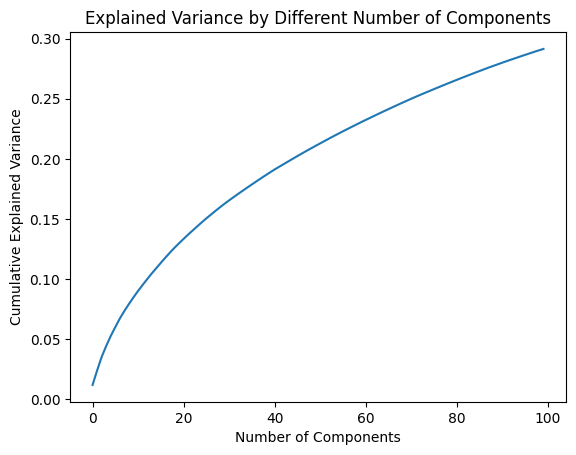

Reduced number of features: 100


In [ ]:
from sklearn.decomposition import TruncatedSVD

# Assuming tfidf_train and tfidf_test are already created TF-IDF feature sets

# Dimensionality analysis
print("Original number of features:", tfidf_train.shape[1])
print("Number of training samples:", tfidf_train.shape[0])

# Check sparsity
sparsity = 1.0 - (tfidf_train.nnz / float(tfidf_train.shape[0] * tfidf_train.shape[1]))
print("Sparsity of TF-IDF matrix:", sparsity)

# Dimensionality reduction using Truncated SVD
n_components = 100  # You can choose a suitable number of components
svd = TruncatedSVD(n_components=n_components)
tfidf_train_reduced = svd.fit_transform(tfidf_train)
tfidf_test_reduced = svd.transform(tfidf_test)

# Explained variance ratio
plt.plot(svd.explained_variance_ratio_.cumsum())
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Different Number of Components')
plt.show()

# After dimensionality reduction
print("Reduced number of features:", tfidf_train_reduced.shape[1])


In [124]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn import metrics
from sklearn.linear_model import PassiveAggressiveClassifier, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


In [150]:
clf=DecisionTreeClassifier()

In [74]:
clf = MultinomialNB()

In [ ]:
clf = BernoulliNB()

In [91]:
clf = PassiveAggressiveClassifier(max_iter=2000)

In [ ]:
clf = SGDClassifier()

In [ ]:
clf = LogisticRegression()

In [151]:

#Bag-of-Words
clf.fit(bow_train, training_label)

pred = clf.predict(bow_test)
score = metrics.accuracy_score(testing_label, pred)

print("accuracy:   %0.3f" % score)

accuracy:   0.386


In [152]:
#N-Grams
clf.fit(ngram_train, training_label)

pred = clf.predict(ngram_test)
score = metrics.accuracy_score(testing_label, pred)

print("accuracy:   %0.3f" % score)

accuracy:   0.382


In [157]:
from sklearn.metrics import f1_score

# Continue from your existing code
clf.fit(tfidf_train, training_label)

pred = clf.predict(tfidf_test)
score = metrics.accuracy_score(testing_label, pred)
f1 = f1_score(testing_label, pred, average='weighted')  # or choose another averaging method

print("accuracy: %0.3f" % score)
print("F1 score: %0.3f" % f1)

accuracy: 0.379
F1 score: 0.301


In [141]:
# Continue from your existing code
clf.fit(tfidf_train_reduced, training_label)

pred = clf.predict(tfidf_test_reduced)
score = metrics.accuracy_score(testing_label, pred)
f1 = f1_score(testing_label, pred, average='weighted')  # or choose another averaging method

print("accuracy: %0.3f" % score)
print("F1 score: %0.3f" % f1)

NameError: name 'tfidf_train_reduced' is not defined

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(training_data['cleanText'], training_data['label'], test_size = .2, random_state = 1)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfTransformer

#MultinomialNB gridSearch
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB())
])
pipeline.get_params()

{'memory': None,
 'steps': [('vect', CountVectorizer()),
  ('tfidf', TfidfTransformer()),
  ('clf', MultinomialNB())],
 'verbose': False,
 'vect': CountVectorizer(),
 'tfidf': TfidfTransformer(),
 'clf': MultinomialNB(),
 'vect__analyzer': 'word',
 'vect__binary': False,
 'vect__decode_error': 'strict',
 'vect__dtype': numpy.int64,
 'vect__encoding': 'utf-8',
 'vect__input': 'content',
 'vect__lowercase': True,
 'vect__max_df': 1.0,
 'vect__max_features': None,
 'vect__min_df': 1,
 'vect__ngram_range': (1, 1),
 'vect__preprocessor': None,
 'vect__stop_words': None,
 'vect__strip_accents': None,
 'vect__token_pattern': '(?u)\\b\\w\\w+\\b',
 'vect__tokenizer': None,
 'vect__vocabulary': None,
 'tfidf__norm': 'l2',
 'tfidf__smooth_idf': True,
 'tfidf__sublinear_tf': False,
 'tfidf__use_idf': True,
 'clf__alpha': 1.0,
 'clf__class_prior': None,
 'clf__fit_prior': True,
 'clf__force_alpha': 'warn'}

In [ ]:
mnb_model = pipeline.fit(training_data['cleanText'], training_data['label'])
mnb_pred = mnb_model.predict(testing_data['cleanText'])

print(f1_score(testing_data['label'], mnb_pred, average='micro'))

0.873501997336884


In [ ]:
params = {
    'clf__alpha': [ 0.8, 0.9, 1.0,],
}

grid = GridSearchCV(pipeline, params, scoring ='f1_micro', n_jobs = -1, verbose = 0, refit = "AUC",
                   return_train_score = True)
grid.fit(training_data['cleanText'], training_data['label'])

GridSearchCV(estimator=Pipeline(steps=[('vect', CountVectorizer()),
                                       ('tfidf', TfidfTransformer()),
                                       ('clf', MultinomialNB())]),
             n_jobs=-1, param_grid={'clf__alpha': [0.8, 0.9, 1.0]}, refit='AUC',
             return_train_score=True, scoring='f1_micro')

In [ ]:
print("F1 Score for training data: %0.3f" % (grid.score(training_data['cleanText'], training_data['label']) * 100))
print("F1 Score for testing data: %0.3f" % (grid.score(testing_data['cleanText'], testing_data['label']) * 100))

F1 Score for training data: 93.341
F1 Score for testing data: 87.031


In [ ]:
grid.best_params_

{'clf__alpha': 0.8}

In [ ]:
mnb_model = pipeline.fit(training_data['cleanText']+training_data["username"]+training_data["imgs"], training_data['label'])
mnb_pred = mnb_model.predict(testing_data['cleanText'])

print(f1_score(testing_data['label'], mnb_pred, average='micro'))

0.6980026631158456


In [ ]:
params = {
    'clf__alpha': [0.8, 0.9, 1.0],
    'clf__fit_prior': [True, False]
}

grid = GridSearchCV(pipeline, params, scoring ='f1_micro', n_jobs = -1, verbose = 0, refit = True, cv=8,
                   return_train_score = True)
grid.fit(training_data['cleanText'], training_data['label'])

ValueError: Invalid parameter 'alpha' for estimator PassiveAggressiveClassifier(). Valid parameters are: ['C', 'average', 'class_weight', 'early_stopping', 'fit_intercept', 'loss', 'max_iter', 'n_iter_no_change', 'n_jobs', 'random_state', 'shuffle', 'tol', 'validation_fraction', 'verbose', 'warm_start'].

In [ ]:
print("F1 Score for training data: %0.3f" % (grid.score(training_data['cleanText'], training_data['label']) * 100))
print("F1 Score for testing data: %0.3f" % (grid.score(testing_data['cleanText'], testing_data['label']) * 100))

F1 Score for training data: 93.341
F1 Score for testing data: 87.031


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import SVC

# SVM with TruncatedSVD (similar to PCA) in the pipeline
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    # ('svd', TruncatedSVD(n_components=1000)),  # Adjust n_components based on your dataset and requirements
    ('clf', PassiveAggressiveClassifier())
])
# View the available parameters for tuning in the pipeline
pipeline.get_params()



{'memory': None,
 'steps': [('vect', CountVectorizer()),
  ('tfidf', TfidfTransformer()),
  ('clf', PassiveAggressiveClassifier())],
 'verbose': False,
 'vect': CountVectorizer(),
 'tfidf': TfidfTransformer(),
 'clf': PassiveAggressiveClassifier(),
 'vect__analyzer': 'word',
 'vect__binary': False,
 'vect__decode_error': 'strict',
 'vect__dtype': numpy.int64,
 'vect__encoding': 'utf-8',
 'vect__input': 'content',
 'vect__lowercase': True,
 'vect__max_df': 1.0,
 'vect__max_features': None,
 'vect__min_df': 1,
 'vect__ngram_range': (1, 1),
 'vect__preprocessor': None,
 'vect__stop_words': None,
 'vect__strip_accents': None,
 'vect__token_pattern': '(?u)\\b\\w\\w+\\b',
 'vect__tokenizer': None,
 'vect__vocabulary': None,
 'tfidf__norm': 'l2',
 'tfidf__smooth_idf': True,
 'tfidf__sublinear_tf': False,
 'tfidf__use_idf': True,
 'clf__C': 1.0,
 'clf__average': False,
 'clf__class_weight': None,
 'clf__early_stopping': False,
 'clf__fit_intercept': True,
 'clf__loss': 'hinge',
 'clf__max_iter

In [ ]:
rfor_model = pipeline.fit(training_data['cleanText'], training_data['label'])
rfor_pred = rfor_model.predict(testing_data['cleanText'])

print(f1_score(testing_data['label'], rfor_pred, average='micro'))

0.7832223701731026


In [ ]:
# param_grid = {
#     'clf__kernel': ["linear"],
#     'clf__C': [1.48],
#     'clf__gamma': ['scale']
#     # Add other hyperparameters and values as needed
# }

parameters = {
    'clf__C': [0.01,0.05, 0.1],
    'clf__max_iter': [ 3000],
    'clf__tol': [1e-3],
    'clf__early_stopping': [False],
    'clf__validation_fraction': [ 0.4],
    'clf__n_iter_no_change': [4],
    'clf__loss': [ 'squared_hinge'],
}

grid_search = GridSearchCV(pipeline, parameters, scoring='accuracy', cv=10, n_jobs=-1, verbose=1)
grid_search.fit(training_data['cleanText'], training_data['label'])


Fitting 10 folds for each of 6 candidates, totalling 60 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('vect', CountVectorizer()),
                                       ('tfidf', TfidfTransformer()),
                                       ('clf', PassiveAggressiveClassifier())]),
             n_jobs=-1,
             param_grid={'clf__C': [0.01, 0.05, 0.1],
                         'clf__early_stopping': [False, True],
                         'clf__loss': ['squared_hinge'],
                         'clf__max_iter': [3000], 'clf__n_iter_no_change': [4],
                         'clf__tol': [0.001],
                         'clf__validation_fraction': [0.4]},
             scoring='accuracy', verbose=1)

In [ ]:
grid_search.best_params_

{'clf__C': 0.01,
 'clf__early_stopping': False,
 'clf__loss': 'squared_hinge',
 'clf__max_iter': 3000,
 'clf__n_iter_no_change': 4,
 'clf__tol': 0.001,
 'clf__validation_fraction': 0.4}

In [ ]:
print("F1 Score for training data: %0.3f" % (grid_search.score(training_data['cleanText'], training_data['label']) * 100))
print("F1 Score for testing data: %0.3f" % (grid_search.score(testing_data['cleanText'], testing_data['label']) * 100))

F1 Score for training data: 94.399
F1 Score for testing data: 74.141


In [ ]:
grid_search.best_params_

{'clf__C': 0.5, 'clf__gamma': 'scale', 'clf__kernel': 'linear'}